<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and inspect data
df = pd.read_csv('Cust_Segmentation.csv')

In [2]:
# Selecting numeric features
X = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:

# K-Means using Euclidean distance
kmeans_euclidean = KMeans(n_clusters=3, random_state=42)
labels_euclidean = kmeans_euclidean.fit_predict(X_scaled)
df['Cluster_Euclidean'] = labels_euclidean

In [4]:
# Custom Manhattan distance-based K-Means
def kmeans_manhattan(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iter):
        distances = pairwise_distances(X, centroids, metric='manhattan')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels_manhattan, centroids_manhattan = kmeans_manhattan(X_scaled, 3)
df['Cluster_Manhattan'] = labels_manhattan

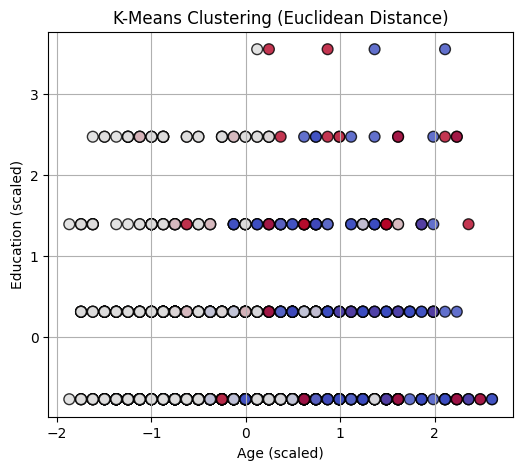

In [6]:
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_euclidean, cmap='coolwarm', s=60, alpha=0.8, edgecolors='k')
plt.title('K-Means Clustering (Euclidean Distance)')
plt.xlabel('Age (scaled)')
plt.ylabel('Education (scaled)')
plt.grid(True)
plt.show()

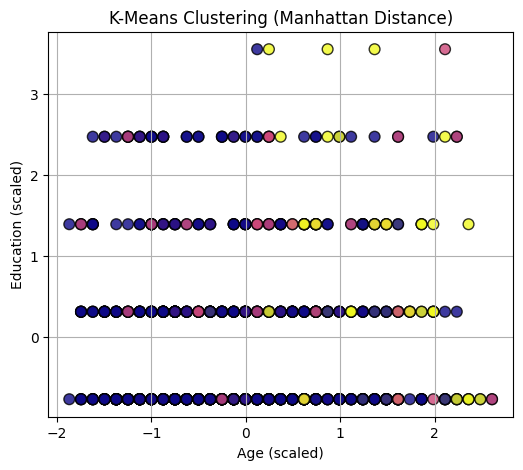

In [7]:
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_manhattan, cmap='plasma', s=60, alpha=0.8, edgecolors='k')
plt.title('K-Means Clustering (Manhattan Distance)')
plt.xlabel('Age (scaled)')
plt.ylabel('Education (scaled)')
plt.grid(True)
plt.show()

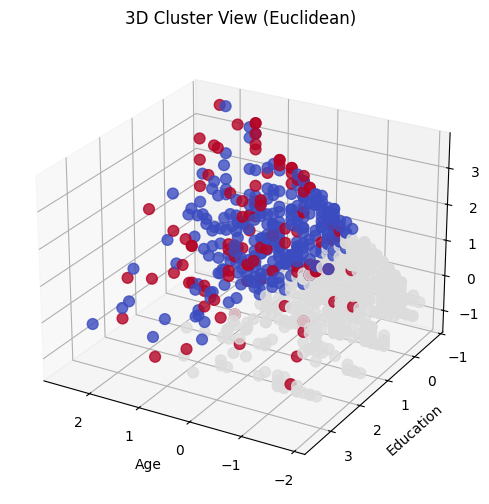

In [8]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels_euclidean, cmap='coolwarm', s=60, alpha=0.8)
ax.set_title('3D Cluster View (Euclidean)')
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Years Employed')
ax.view_init(elev=25, azim=120)
plt.show()

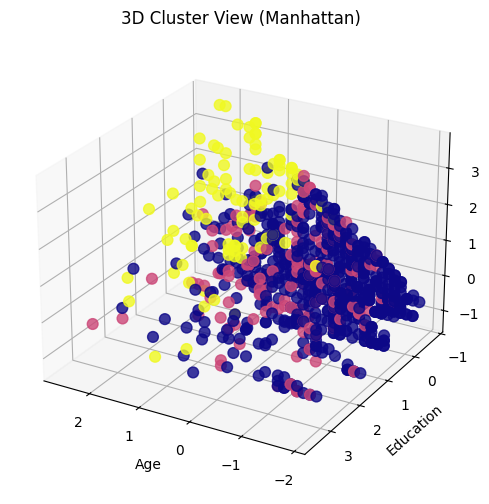

In [9]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels_manhattan, cmap='plasma', s=60, alpha=0.8)
ax2.set_title('3D Cluster View (Manhattan)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Education')
ax2.set_zlabel('Years Employed')
ax2.view_init(elev=25, azim=120)
plt.show()